**Kmeans using Autoencoder**

In [0]:
!pip install -q tensorflow

from IPython.display import Image,SVG
import matplotlib.pyplot as plt


%matplotlib inline

import numpy as np 
import keras
from keras.datasets import mnist
from keras.models import Model,Sequential
from keras.layers  import Input,Dense,Conv2D,MaxPool2D,UpSampling2D,Flatten,Reshape,Dropout
from keras import regularizers
from keras.layers.normalization import BatchNormalization

from keras import backend as K
from sklearn.cluster import KMeans

In [3]:
fashion_mnist = keras.datasets.fashion_mnist(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  #load data      

4423680/4422102 [==============================] - 1s 0us/step


In [0]:
train_images=train_images/255.0
test_images=test_images/255.0                                   #normalize data

In [0]:
train_image=train_images.reshape((60000,28,28,1))
test_image=test_images.reshape((10000,28,28,1))                 #reshape data

In [6]:
#encoder

model = Sequential()
model.add(Conv2D(14, kernel_size=3, padding='same', activation='sigmoid', input_shape=(28,28,1)))
model.add(MaxPool2D((2,2), padding='same'))

model.add(Conv2D(7, kernel_size=3, padding='same', activation='sigmoid'))
model.add(MaxPool2D((2,2), padding='same'))

#decoder
model.add(Conv2D(7, kernel_size=3, padding='same', activation='sigmoid'))
model.add(UpSampling2D((2,2)))

model.add(Conv2D(14, kernel_size=3, padding='same', activation='sigmoid'))
model.add(UpSampling2D((2,2)))

model.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

model.compile(optimizer='adam', loss="mse")
model.summary()









Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 14)        140       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 14)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 7)         889       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 7)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 7)           448       
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 7)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 14) 

In [7]:
 model1=model.fit(train_image,train_image,epochs=20,batch_size=64,shuffle=True,validation_data=(test_image,test_image))     #fit the model





Train on 60000 samples, validate on 10000 samples
Epoch 1/20





60000/60000 [==============================] - 88s 1ms/step - loss: 0.0454 - val_loss: 0.0208
Epoch 2/20
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0189 - val_loss: 0.0173
Epoch 3/20
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0159 - val_loss: 0.0149
Epoch 4/20
60000/60000 [==============================] - 90s 1ms/step - loss: 0.0141 - val_loss: 0.0136
Epoch 5/20
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0130 - val_loss: 0.0126
Epoch 6/20
60000/60000 [==============================] - 90s 1ms/step - loss: 0.0122 - val_loss: 0.0119
Epoch 7/20
60000/60000 [==============================] - 89s 1ms/step - loss: 0.0116 - val_loss: 0.0114
Epoch 8/20
60000/60000 [==============================] - 90s 1ms/step - loss: 0.0111 - val_loss: 0.0109
Epoch 9/20
60000/60000 [==============================] - 89s 1ms/step - loss: 0.0106 - val_loss: 0.01

In [0]:
restored_testing_dataset=model.predict(test_image)     #predict test case

In [0]:
encoder = K.function([model.layers[0].input], [model.layers[4].output])    

In [0]:
encoded_images=encoder([test_image])[0].reshape(-1,7*7*7)

In [0]:
kmeans=KMeans(n_clusters=10)
clustered_training_set=kmeans.fit_predict(encoded_images)

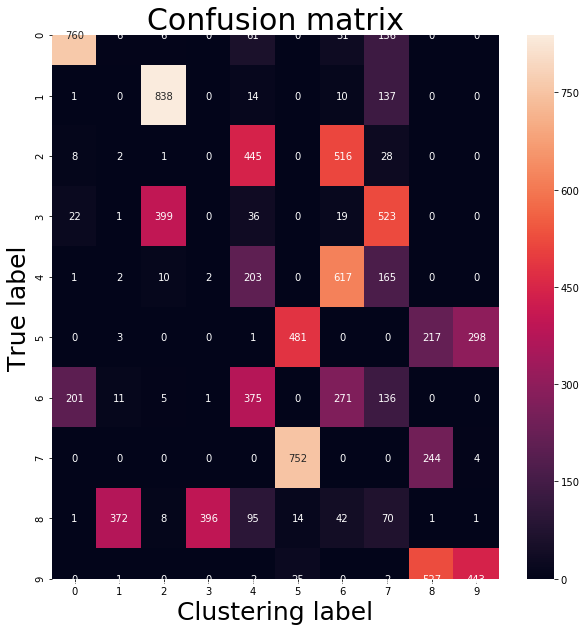

In [12]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(test_labels, clustered_training_set)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix", fontsize=30)
plt.ylabel('True label', fontsize=25)
plt.xlabel('Clustering label', fontsize=25)
plt.show()

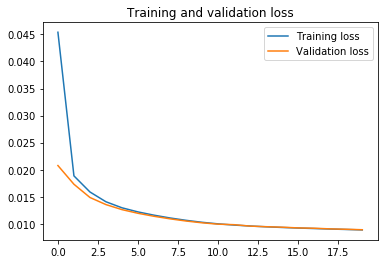

In [14]:
#loss function

loss=model1.history['loss']
val_loss=model1.history['val_loss']
epochs=range(20)
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [15]:
#accuracy
from sklearn import metrics
from sklearn.metrics import completeness_score
completeness_score(test_labels,clustered_training_set)

0.5754471143930779